<a href="https://colab.research.google.com/github/coder160/cuadernos/blob/main/Vision_Artificial/Transformers/DETECCION_OBJETOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Object Detection

La detección de objetos es una tarea fundamental en la Visión Artificial que implica identificar y localizar objetos específicos en una imagen o en una secuencia de video. Se basa en algoritmos y modelos que analizan características visuales, como bordes, colores y texturas, para identificar objetos y sus ubicaciones en la imagen. La detección de objetos es esencial en aplicaciones como la conducción autónoma, la vigilancia, la automatización industrial y la realidad aumentada.

Documentación:

* **Transformers** - https://huggingface.co/docs/transformers/v4.32.1/en/index

* **Modelo FaceBook/DETR-ResNet-50** - https://huggingface.co/facebook/detr-resnet-50

* **Papper** - https://arxiv.org/abs/2005.12872

* **Repositorio** - https://github.com/facebookresearch/detr

* **PIL** - https://pypi.org/project/Pillow/

* **requests** - https://pypi.org/project/requests/

* **timm** - https://pypi.org/project/timm/

### **Ejemplo**:

>Para nuestro ejemplo utilizaremos la Detección de Objetos End-to-End (DETR - End-to-End Object Detection) con el modelo de<a href="https://huggingface.co/facebook/detr-resnet-50"> Facebook/detr-resnet-50</a> basado en el <a href="https://arxiv.org/abs/2005.12872"> papper </a> de Nicolas Carion et al.
>
>Este Modelo fue entrenado con COCO2017 (118k imagenes etiquetadas). Para mas información visita su repositorio oficial:
https://github.com/facebookresearch/detr

*Mas información en:*

https://huggingface.co/facebook/detr-resnet-50

In [1]:
#@title **Instalador Principal**

#@markdown # **Importante**
#@markdown **Recuerda instalar primero la librería principal junto con todos sus componentes.**

from IPython.display import clear_output

#Instalar el módulo de entornos virtuales venv de python
!apt install python3.10-venv

#Crear nuestro entorno virtual
!python -m venv .env

#Activamos nuestro entorno virtual
!source .env/bin/activate

#Instalamos todas las dependencias de Transformers necesarias
!pip install transformers
!pip install 'transformers[torch]'
!pip install 'transformers[tf-cpu]'
!pip install 'transformers[flax]'
!pip install timm
clear_output()

#Realizamos una prueba para verificar que el código funciona
print("Instalación correcta")

Instalación correcta


Imagen lista


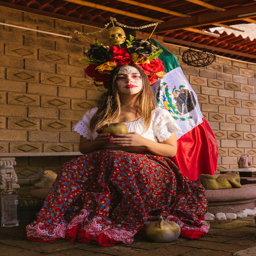

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Modelo:	facebook/detr-resnet-50
Procesador:	facebook/detr-resnet-50
Objeto Encontrado:	 bottle. Probabilidad: 0.979 en ubicación: [0.24, 626.8, 44.21, 802.94].
Objeto Encontrado:	 apple. Probabilidad: 0.989 en ubicación: [233.16, 432.4, 301.87, 481.73].
Objeto Encontrado:	 person. Probabilidad: 0.998 en ubicación: [54.98, 221.3, 495.57, 864.99].
Objeto Encontrado:	 apple. Probabilidad: 0.954 en ubicación: [334.76, 761.89, 424.16, 856.53].


In [7]:
#@title **Ejemplo práctico**
try:
  #@markdown 1. Importamos todas las librerías necesarias
  #@markdown para el procesamiento y detección de objetos
  #@markdown junto con algunas librerías de apoyo
  from transformers import DetrImageProcessor, DetrForObjectDetection
  from io import BytesIO
  from PIL import Image
  import requests
  import torch


  #@markdown 2. Definimos la ruta de nuestra imagen
  nueva_imagen = "https://images.pexels.com/photos/13708765/pexels-photo-13708765.jpeg?auto=compress&cs=tinysrgb&w=600" # @param {type:"string"}

  #@markdown 3. Obtenemos la imagen desde internet
  img = requests.get(nueva_imagen, stream=True)
  imagen_prueba = Image.open(img.raw)
  print("Imagen lista")

  #@markdown *Opcional para previsualizar la imagen descargada*
  display_img = True # @param {type:"boolean"}
  img_show = requests.get(nueva_imagen)
  display(Image.open(BytesIO(img_show.content)).resize((256,256)))

  #@markdown 4. Configuramos nuestro procesador y modelo para detección de objetos
  nombre_procesador = "facebook/detr-resnet-50" # @param {type:"string"}
  nombre_modelo = "facebook/detr-resnet-50" # @param {type:"string"}
  procesador = DetrImageProcessor.from_pretrained(nombre_procesador)
  modelo = DetrForObjectDetection.from_pretrained(nombre_modelo)
  print(f"Modelo:\t{nombre_modelo}\nProcesador:\t{nombre_procesador}")

  #@markdown 5. Procesamos nuestra imagen e imprimimos la predicción
  inputs = procesador(images=imagen_prueba, return_tensors="pt")
  outputs = modelo(**inputs)

  #realizamos un post-procesado de datos
  objetos = torch.tensor([imagen_prueba.size[::-1]])
  #filtramos objetos con probabilidad mayor al 90%
  resultados = procesador.post_process_object_detection(outputs, target_sizes=objetos, threshold=0.9)[0]
  #imprimimos cada resultado con su probabilidad
  for probabilidad, etiqueta, ubicacion in zip(resultados["scores"], resultados["labels"], resultados["boxes"]):
      ubicacion = [round(i, 2) for i in ubicacion.tolist()]
      print(f"Objeto Encontrado:\t {modelo.config.id2label[etiqueta.item()]}.",
            f"Probabilidad: {round(probabilidad.item(), 3)} en ubicación: {ubicacion}.")

except Exception as error:
  print(f"No es Chems\n{error}")

#@markdown El modelo realiza una predicción sobre los objetos detectados y su ubicación en la imagen.

Realiza la práctica interactiva en Colab: <a href="https://colab.research.google.com/github/coder160/cuadernos/blob/main/Vision_Artificial/Transformers/DETECCION_OBJETOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>